In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap 
shap.initjs()

In [39]:
df=pd.read_csv('C:/Users/vasav/py.prog/Dataset.csv')

About Feature_1:

In [40]:
print(df['Feature_1'].mode()[0])
print(df['Feature_1'].mean())
print(df['Feature_1'].median())
print(df['Feature_1'].min())
print(df['Feature_1'].max())
print(df['Feature_1'].value_counts())


17.0
16.74795417348609
17.0
15.0
22.0
Feature_1
17.0    170
16.0    169
18.0    130
15.0    103
19.0     30
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64


About Feature_2:

2.0
1.913764510779436
2.0
1.0
4.0
Feature_2
2.0    279
1.0    204
3.0     88
4.0     32
Name: count, dtype: int64


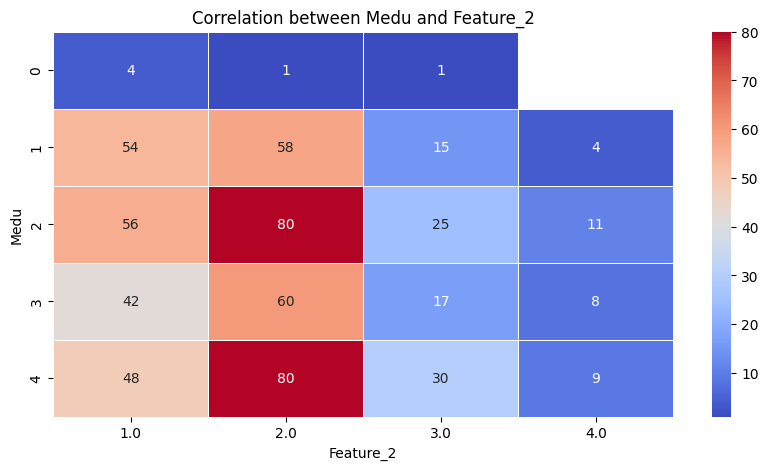

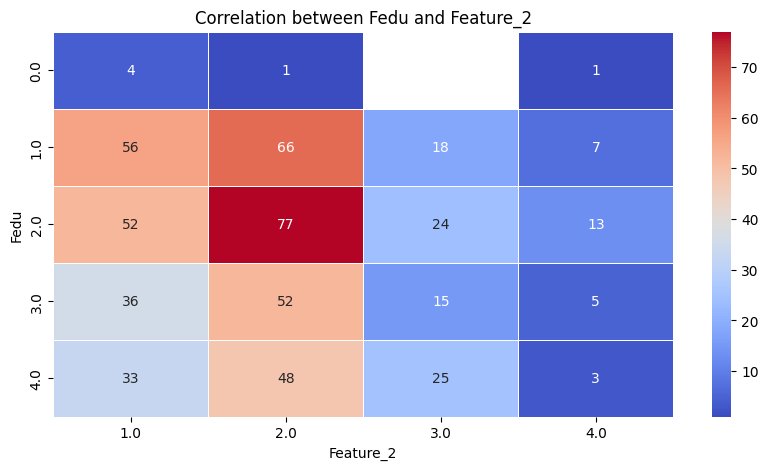

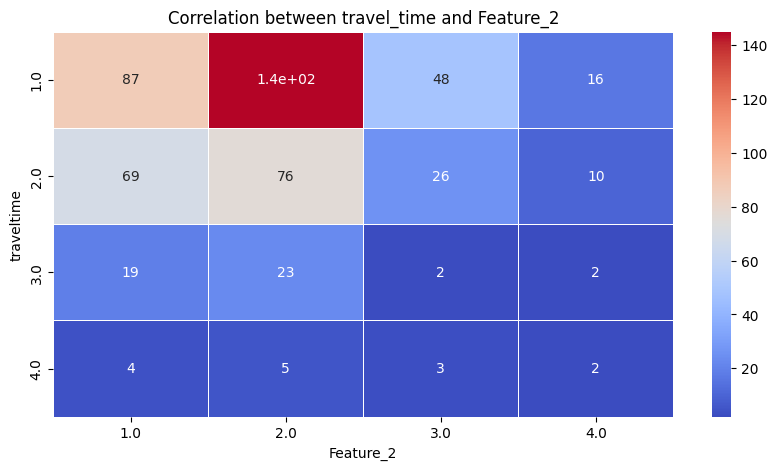

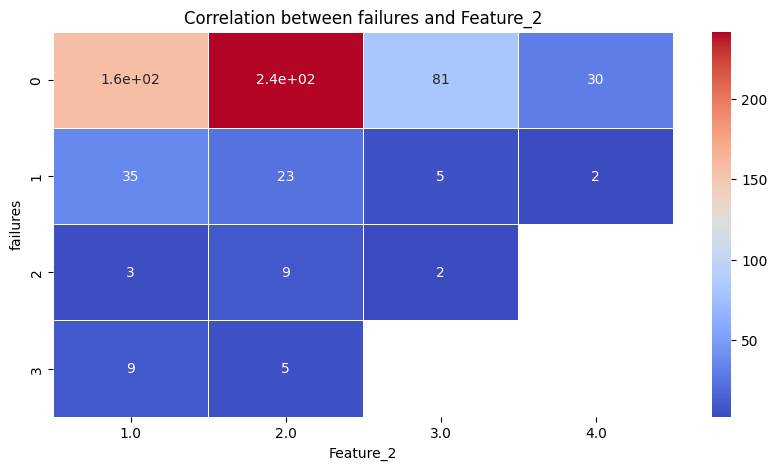

In [41]:
print(df['Feature_2'].mode()[0])
print(df['Feature_2'].mean())
print(df['Feature_2'].median())
print(df['Feature_2'].min())
print(df['Feature_2'].max())
print(df['Feature_2'].value_counts())
test_1=df.groupby(['Medu','Feature_2']).size().unstack()
test_2=df.groupby(['Fedu','Feature_2']).size().unstack()
test_3=df.groupby(['traveltime','Feature_2']).size().unstack()
test_4=df.groupby(['failures','Feature_2']).size().unstack()
plt.figure(figsize=(10,5))
sns.heatmap(test_1,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between Medu and Feature_2')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_2,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between Fedu and Feature_2')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_3,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between travel_time and Feature_2')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_4,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between failures and Feature_2')
plt.show()


About Feature_3:

1.0
2.262295081967213
2.0
1.0
5.0
Feature_3
1.0    239
2.0    137
3.0    109
4.0     85
5.0     40
Name: count, dtype: int64


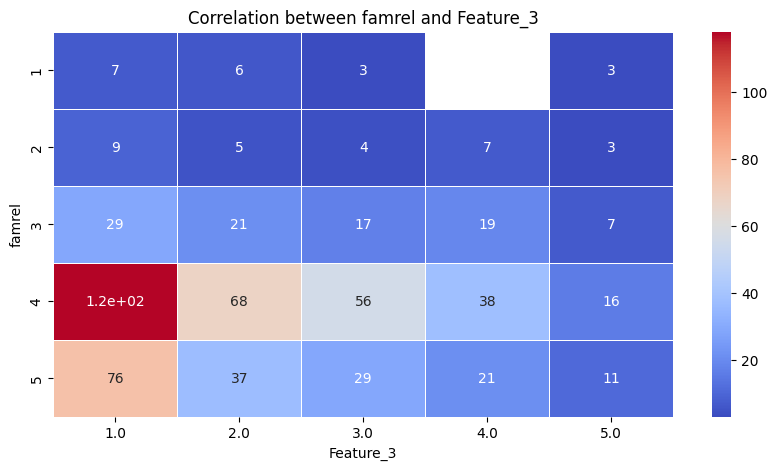

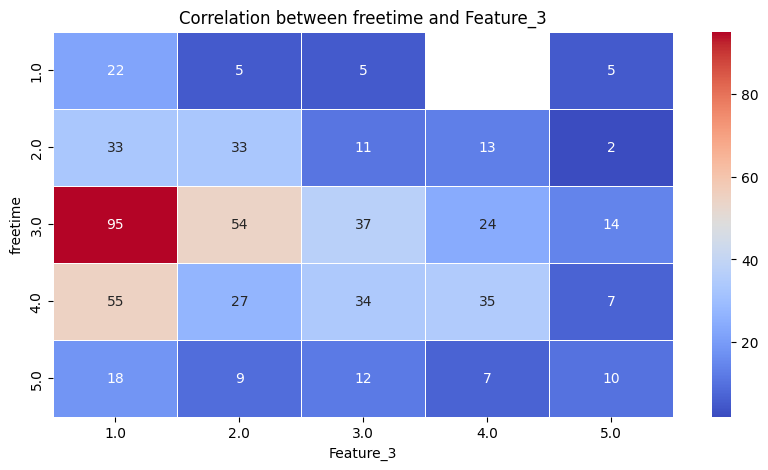

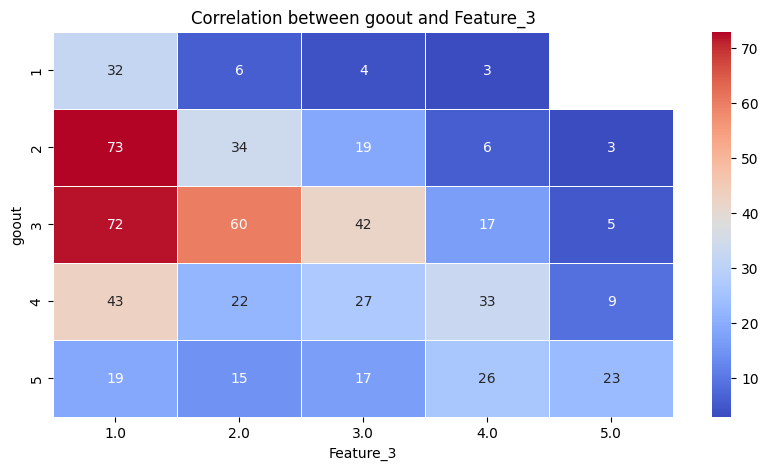

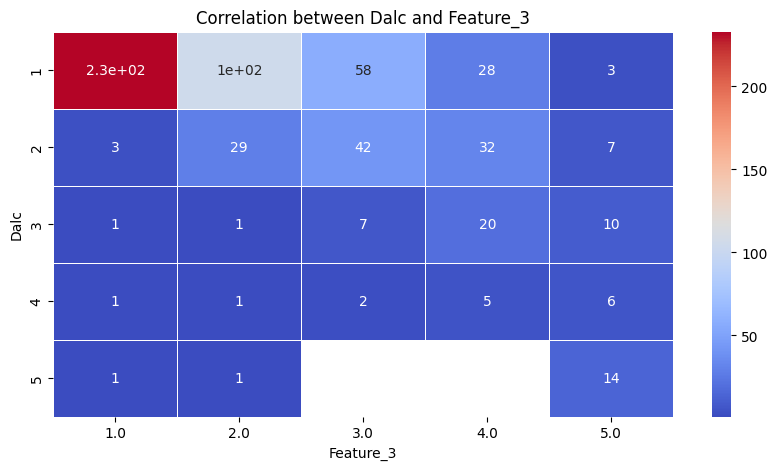

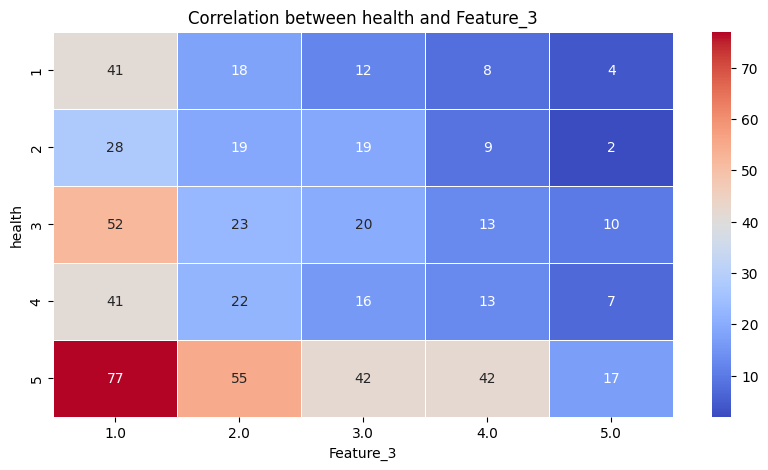

In [42]:
print(df['Feature_3'].mode()[0])
print(df['Feature_3'].mean())
print(df['Feature_3'].median())
print(df['Feature_3'].min())
print(df['Feature_3'].max())
print(df['Feature_3'].value_counts())
test_1=df.groupby(['famrel','Feature_3']).size().unstack()
test_2=df.groupby(['freetime','Feature_3']).size().unstack()
test_3=df.groupby(['goout','Feature_3']).size().unstack()
test_4=df.groupby(['Dalc','Feature_3']).size().unstack()
test_5=df.groupby(['health','Feature_3']).size().unstack()
plt.figure(figsize=(10,5))
sns.heatmap(test_1,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between famrel and Feature_3')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_2,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between freetime and Feature_3')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_3,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between goout and Feature_3')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_4,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between Dalc and Feature_3')
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(test_5,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between health and Feature_3')
plt.show()


Data Preprocessing:

In [43]:
df['famsize'] = df['famsize'].fillna((df['famsize'].mode()[0]))
df['traveltime'] = df['traveltime'].fillna(round(df['traveltime'].mean()))
df['Fedu']=df['Fedu'].fillna(round(df['Fedu'].mean()))
df['higher']=df['higher'].fillna(df['higher'].mode()[0])
df['freetime']=df['freetime'].fillna(df['freetime'].mode()[0])
df['absences']=df['absences'].fillna(round(df['absences'].mean()))
df['G2']=df['G2'].fillna(round(df['G2'].mean()))
df['Feature_1']=df['Feature_1'].fillna(df['Feature_1'].mode()[0])
df['Feature_2']=df['Feature_2'].fillna(df['Feature_2'].mode()[0])
df['Feature_3']=df['Feature_3'].fillna(df['Feature_3'].mode()[0])

In [44]:
#checking for null values in the dataset
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [45]:
#converted string categorical variables to numerical values
df['school']=df['school'].map({'GP':0,'MS':1})
df['sex']=df['sex'].map({'F':0,'M':1})
df['address']=df['address'].map({'U':0,'R':1})
df['famsize']=df['famsize'].map({'GT3':1,'LE3':0})  
df['Pstatus']=df['Pstatus'].map({'T':1,'A':0})
df['Mjob']=df['Mjob'].map({'at_home':0,'health':1,'other':2,'services':3,'teacher':4})
df['Fjob']=df['Fjob'].map({'at_home':0,'health':1,'other':2,'services':3,'teacher':4})
df['reason']=df['reason'].map({'course':0,'home':1,'reputation':2,'other':3})
df['schoolsup']=df['schoolsup'].map({'no':0,'yes':1})
df['famsup']=df['famsup'].map({'yes':1,'no':0})
df['paid']=df['paid'].map({'no':0,'yes':1})
df['activities']=df['activities'].map({'no':0,'yes':1})
df['nursery']=df['nursery'].map({'yes':1,'no':0})
df['higher']=df['higher'].map({'no':0,'yes':1})
df['internet']=df['internet'].map({'no':0,'yes':1})

Level-3(Task-1):

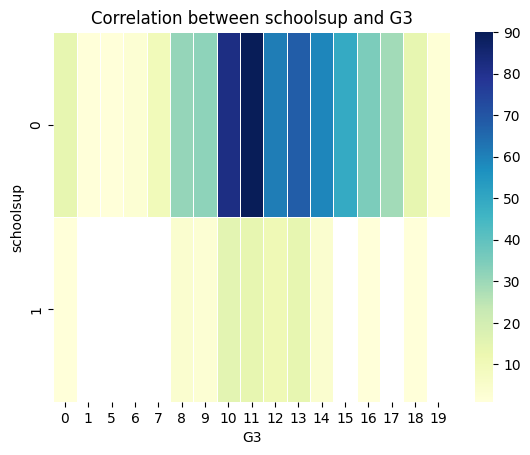

In [46]:
#1).schoolsup vs G3
plt.Figure(figsize=(20, 10))
pivot=df.groupby(['schoolsup', 'G3']).size().unstack()
sns.heatmap(pivot, annot=False, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation between schoolsup and G3')
plt.show()

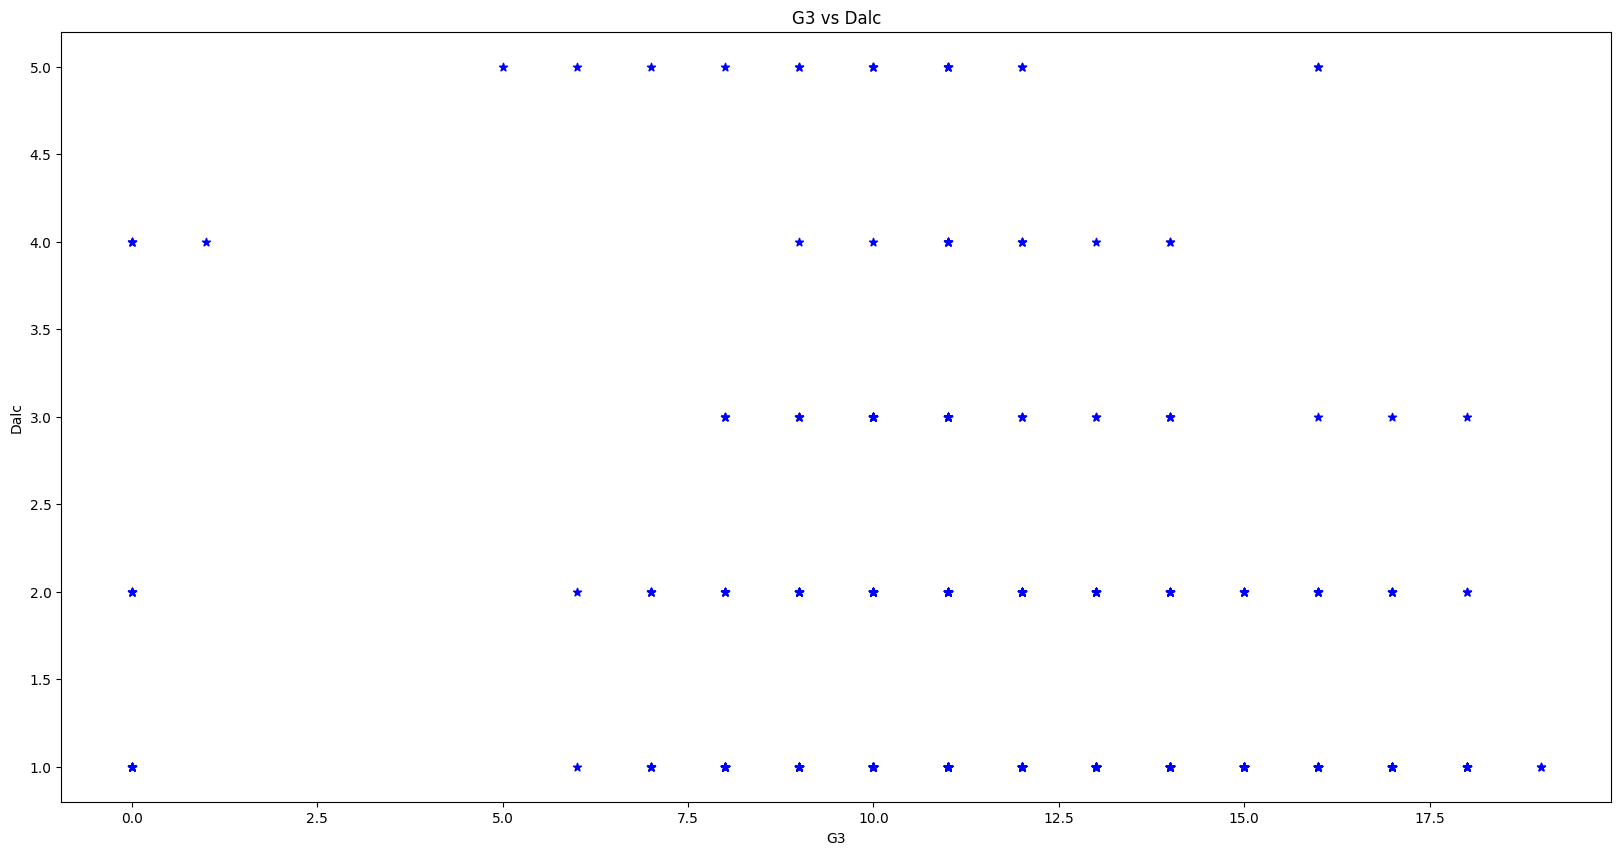

In [47]:
#2)G3 vs Dalc
plt.figure(figsize=(20, 10))
plt.scatter(x=df['G3'],y=df['Dalc'],c='blue',marker='*')
plt.title('G3 vs Dalc')
plt.xlabel('G3')
plt.ylabel('Dalc')
plt.show()

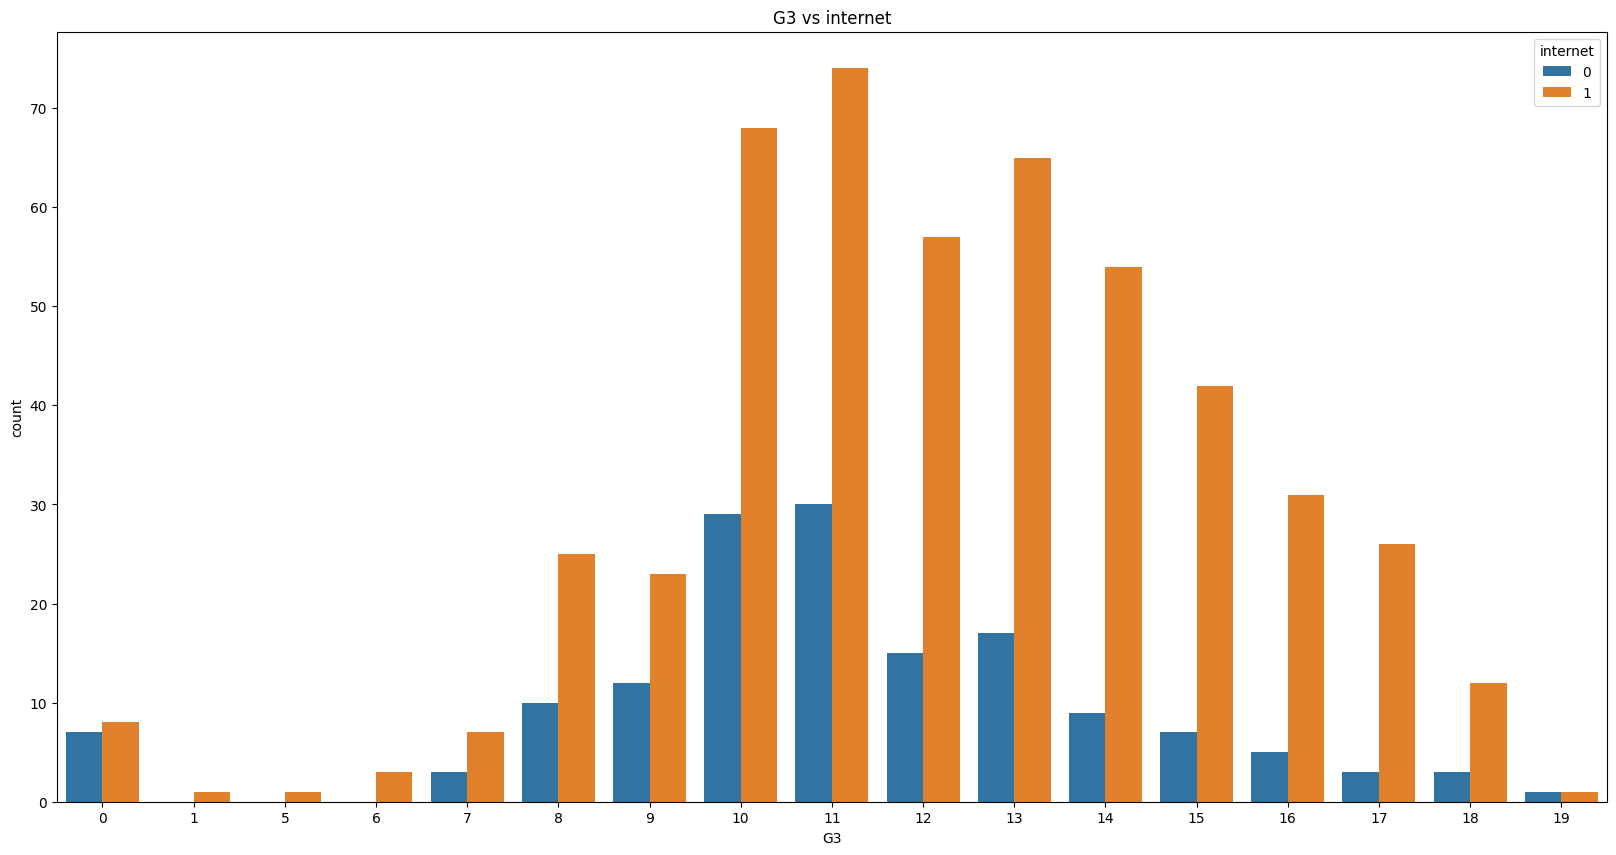

In [48]:
#3).internet acess vs G3
plt.figure(figsize=(20, 10))
sns.countplot(x='G3',hue='internet',data=df)
plt.title('G3 vs internet')
plt.show()

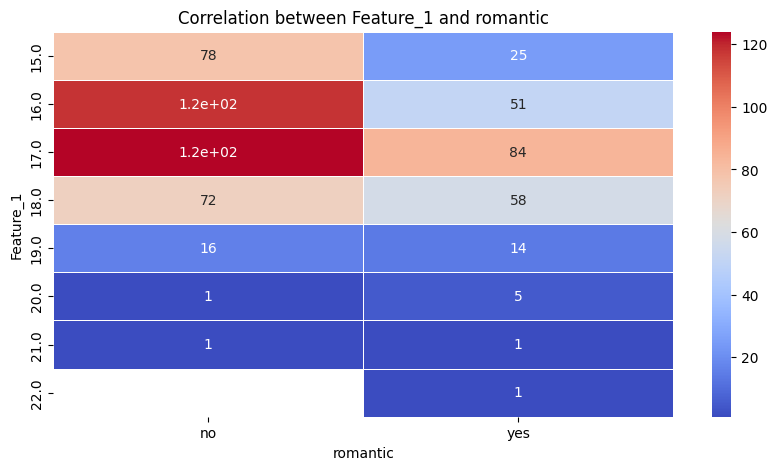

In [49]:
#3).Feature_1 vs romantic
a=df.groupby(['Feature_1','romantic']).size().unstack()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between Feature_1 and romantic') 
plt.show()

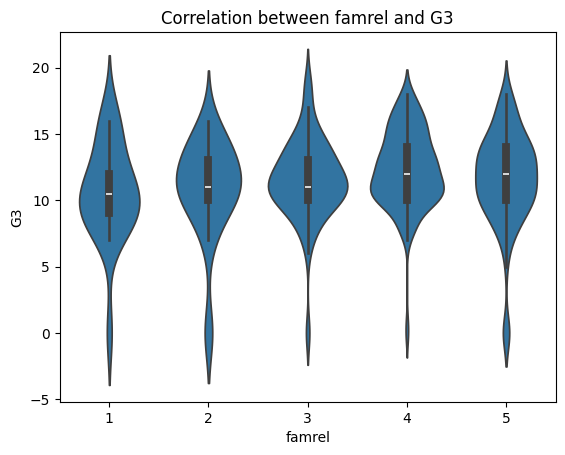

In [50]:
#5).how grades are affected by famrel?
plt.Figure(figsize=(20, 10))
sns.violinplot(x='famrel',y='G3',data=df)
plt.title('Correlation between famrel and G3')
plt.show()

Level-4(Task-1)

                                            School Vs Romantic                                                                              

In [51]:
from sklearn.model_selection import train_test_split
X_a=df[['reason','traveltime','failures','internet','higher','schoolsup','famsup','paid','activities','nursery']]
df['romantic']=df['romantic'].map({'yes': 1, 'no': 0})
y=df['romantic']
x_a=pd.get_dummies(X_a, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x_a, y, test_size=0.2, random_state=42)


LogisticRegression
Accuracy: 0.6230769230769231
Confusion Matrix:
 [[78  3]
 [46  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.96      0.76        81
           1       0.50      0.06      0.11        49

    accuracy                           0.62       130
   macro avg       0.56      0.51      0.44       130
weighted avg       0.58      0.62      0.52       130



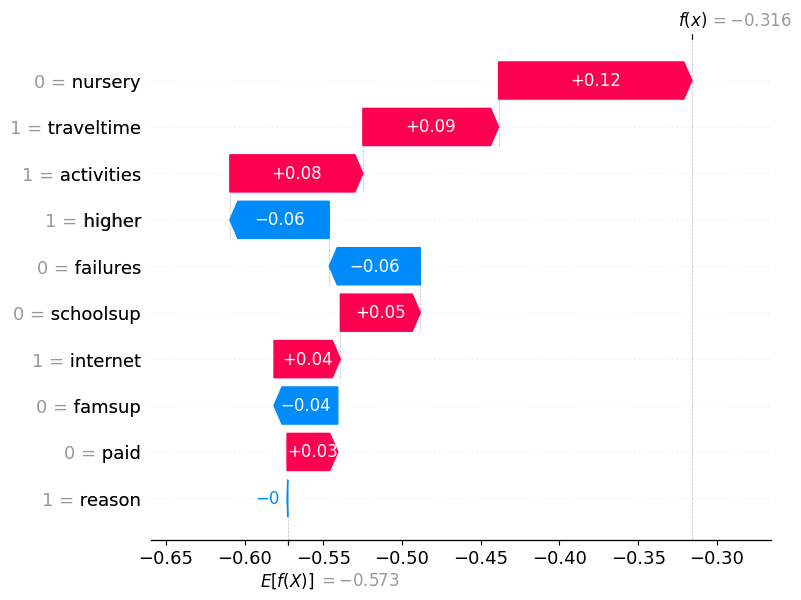

DecisionTreeClassifier
Accuracy: 0.5692307692307692
Confusion Matrix:
 [[62 19]
 [37 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.77      0.69        81
           1       0.39      0.24      0.30        49

    accuracy                           0.57       130
   macro avg       0.51      0.51      0.49       130
weighted avg       0.54      0.57      0.54       130



<Figure size 640x480 with 0 Axes>

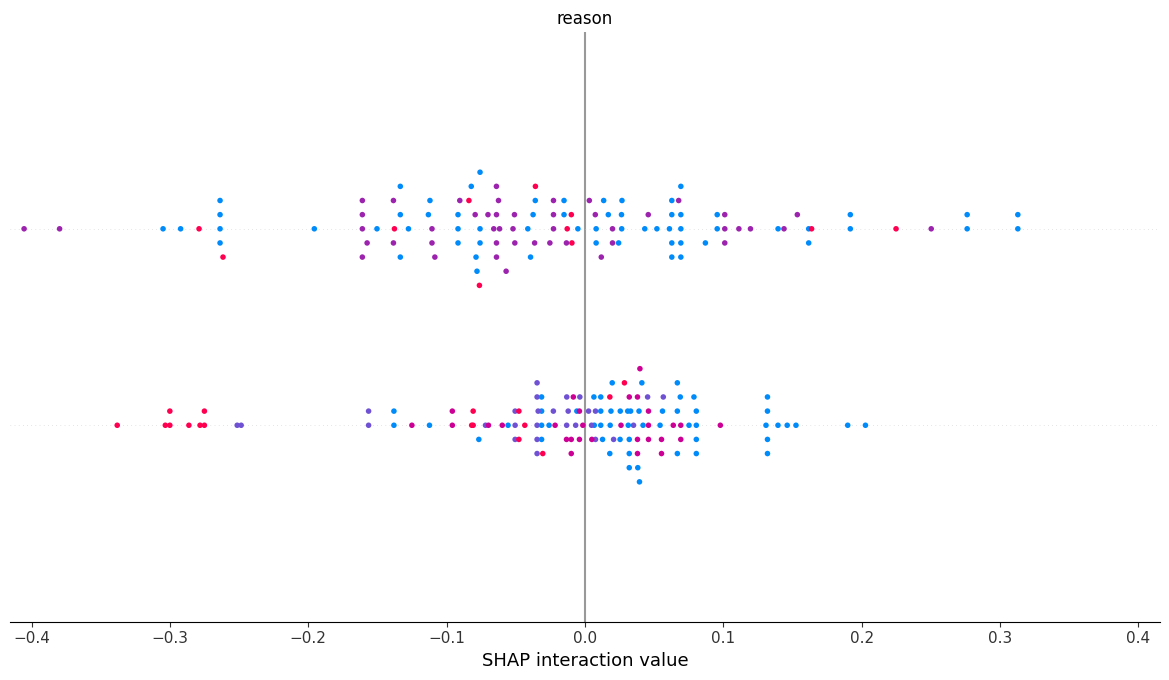

RandomForestClassifier
Accuracy: 0.5692307692307692
Confusion Matrix:
 [[62 19]
 [37 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.77      0.69        81
           1       0.39      0.24      0.30        49

    accuracy                           0.57       130
   macro avg       0.51      0.51      0.49       130
weighted avg       0.54      0.57      0.54       130



<Figure size 640x480 with 0 Axes>

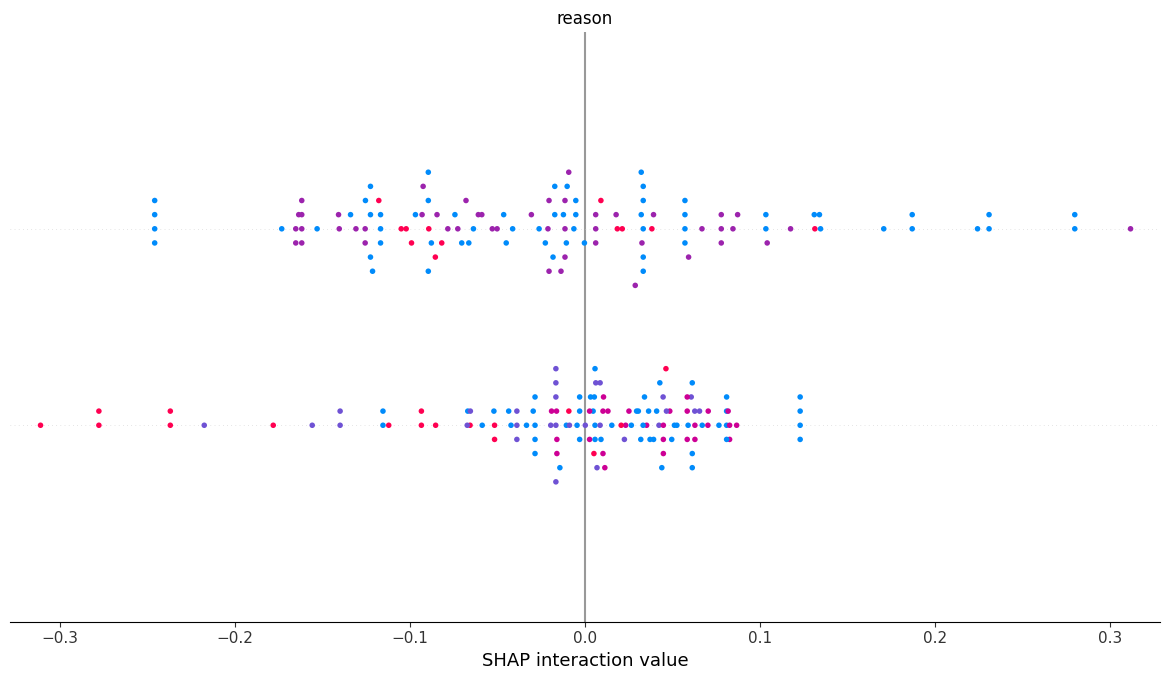

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = (LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier())
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if(model.__class__.__name__ == 'RandomForestClassifier' or model.__class__.__name__ == 'DecisionTreeClassifier'):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer(x_test)
        shap.summary_plot(shap_values, x_test, plot_type="bar") 
    elif(model.__class__.__name__ == 'LogisticRegression'):
        explainer = shap.Explainer(model, x_train)
        shap_values = explainer(x_test)
        shap.plots.waterfall(shap_values[0])

                                                Behaviour Vs Romantic                                                                         

LogisticRegression
Accuracy: 0.6230769230769231
Confusion Matrix:
 [[80  1]
 [48  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.99      0.77        81
           1       0.50      0.02      0.04        49

    accuracy                           0.62       130
   macro avg       0.56      0.50      0.40       130
weighted avg       0.58      0.62      0.49       130



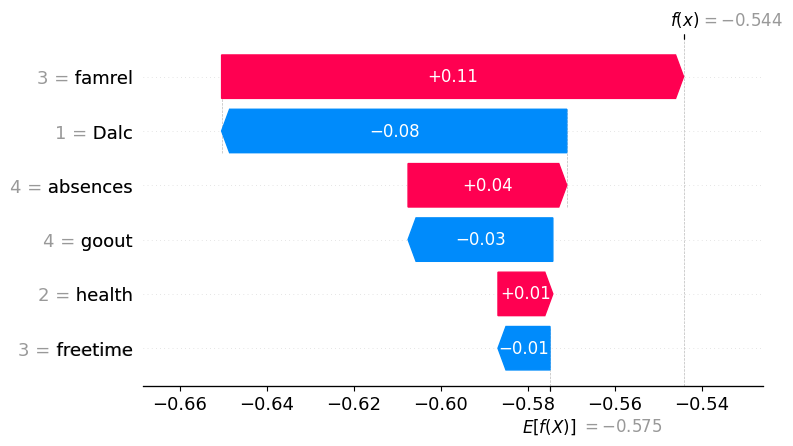

DecisionTreeClassifier
Accuracy: 0.5615384615384615
Confusion Matrix:
 [[55 26]
 [31 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        81
           1       0.41      0.37      0.39        49

    accuracy                           0.56       130
   macro avg       0.52      0.52      0.52       130
weighted avg       0.55      0.56      0.56       130



<Figure size 640x480 with 0 Axes>

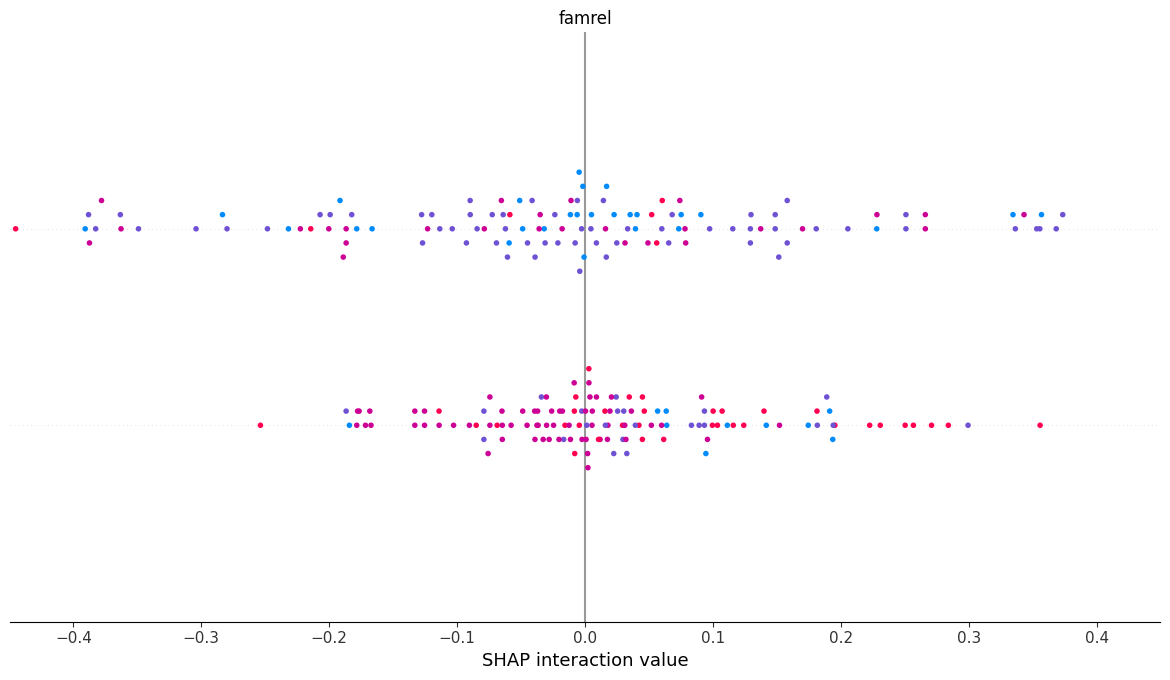

RandomForestClassifier
Accuracy: 0.5846153846153846
Confusion Matrix:
 [[61 20]
 [34 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        81
           1       0.43      0.31      0.36        49

    accuracy                           0.58       130
   macro avg       0.54      0.53      0.53       130
weighted avg       0.56      0.58      0.57       130



<Figure size 640x480 with 0 Axes>

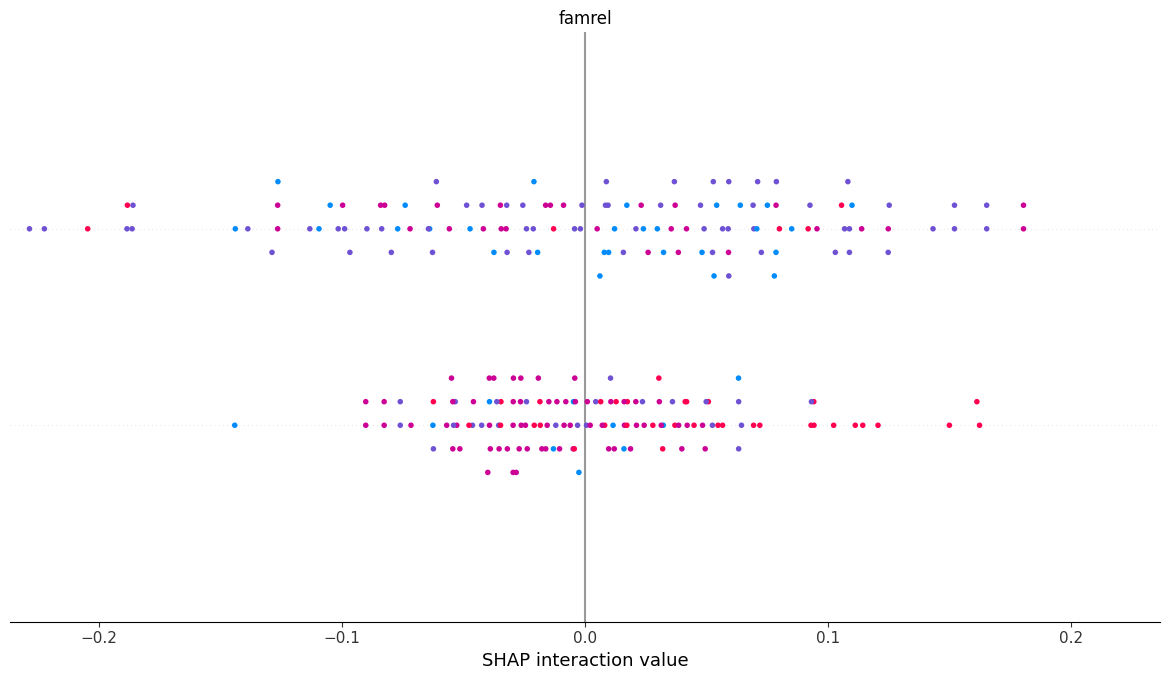

In [ ]:
X_b=df[['famrel','freetime','goout','Dalc','health','absences']]
x_b=pd.get_dummies(X_b, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x_b, y, test_size=0.2, random_state=42)
models = (LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier())
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Classification Report:\n", classification_report(y_test, y_pred))
    if(model.__class__.__name__ == 'RandomForestClassifier' or model.__class__.__name__ == 'DecisionTreeClassifier'):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x_test)
        shap.summary_plot(shap_values, x_test, plot_type="waterfall") 
    elif(model.__class__.__name__ == 'LogisticRegression'):
        explainer = shap.Explainer(model, x_train)
        shap_values = explainer(x_test)
        shap.plots.waterfall(shap_values[0])

                                            Academic_Performance Vs Romantic                                                                  

LogisticRegression
Accuracy: 0.6153846153846154


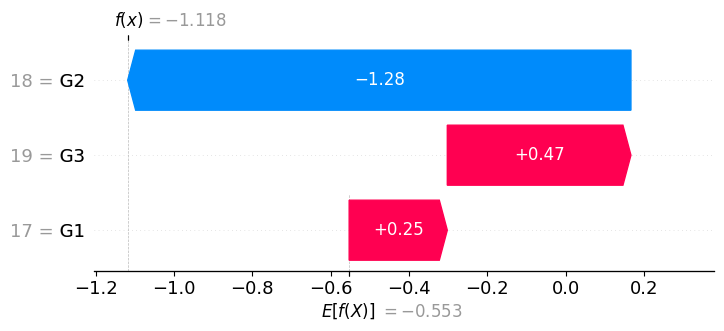

DecisionTreeClassifier
Accuracy: 0.6230769230769231


<Figure size 640x480 with 0 Axes>

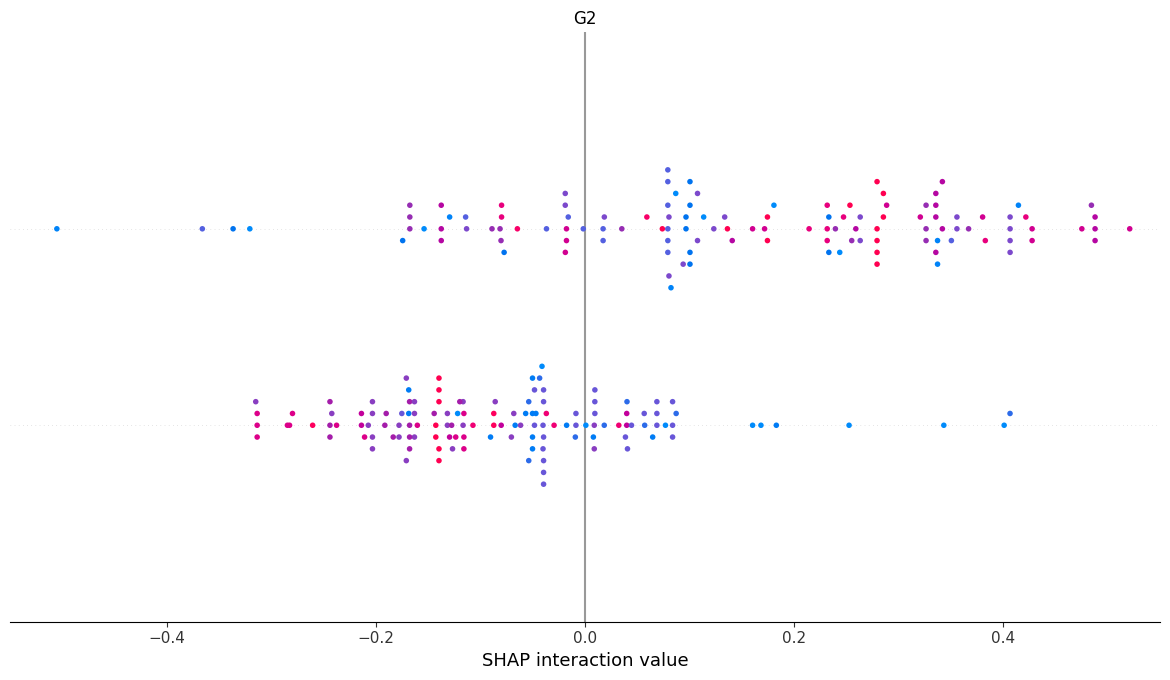

RandomForestClassifier
Accuracy: 0.6461538461538462


<Figure size 640x480 with 0 Axes>

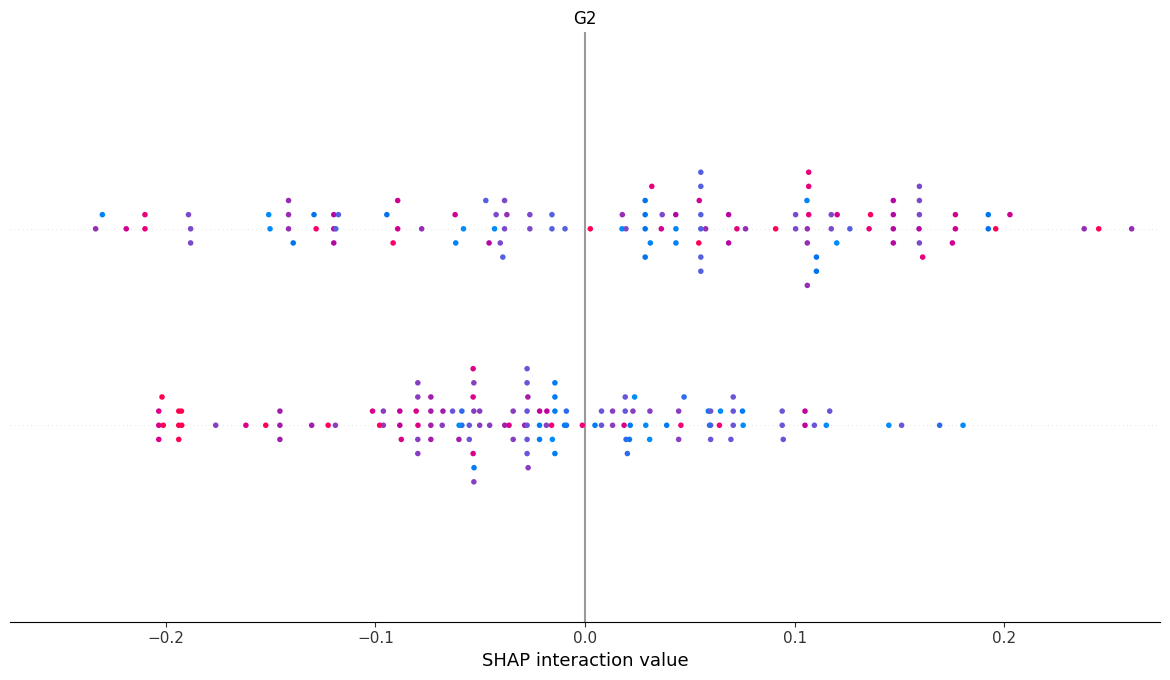

In [55]:
X_g=df[['G1','G2','G3']]
x_g=pd.get_dummies(X_g, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x_g, y, test_size=0.2, random_state=42)
models = (LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier())
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Classification Report:\n", classification_report(y_test, y_pred))
    if(model.__class__.__name__ == 'RandomForestClassifier' or model.__class__.__name__ == 'DecisionTreeClassifier'):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x_test)
        shap.summary_plot(shap_values, x_test, plot_type="waterfall") 
    elif(model.__class__.__name__ == 'LogisticRegression'):
        explainer = shap.Explainer(model, x_train)
        shap_values = explainer(x_test)
        shap.plots.waterfall(shap_values[0])